# ECG classification model

In [1]:
# Import module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_filepath = 'D:/Test Jupyter/ECG-Classfier-main/data/ecg_featurizer/'

X_train = np.load(data_filepath + 'X_train.npy')
y_train = np.load(data_filepath + 'y_train.npy', allow_pickle=True)
X_test = np.load(data_filepath + 'X_test.npy')
y_test = np.load(data_filepath + 'y_test.npy', allow_pickle=True)

# reshape y_train, y_test
# y_train = y_train.reshape(len(y_train), 5)
# y_test = y_test.reshape(len(y_test), 5)

In [3]:
y_train.shape

(17441, 5)

In [4]:
value_at_index = y_train[40]
print(value_at_index)

[1 0 0 0 0]


In [5]:
# def shuffle_train_test(X_train, y_train, X_test, y_test):
#     shuffled_indices_x = np.random.permutation(len(y_train))
#     shuffled_indices_y = np.random.permutation(len(y_test))

#     return X_train[shuffled_indices_x], y_train[shuffled_indices_x], X_test[shuffled_indices_y], y_test[shuffled_indices_y]

In [6]:
# # Scramble the data
# X_train, y_train, X_test, y_test = shuffle_train_test(X_train, y_train, X_test, y_test)

## View data and adjust data format

### Check whether the dimensions of input x and label match

In [7]:
X_train.shape

(17441, 26)

In [8]:
y_train.shape

(17441, 5)

In [9]:
X_test.shape

(4396, 26)

In [10]:
y_test.shape

(4396, 5)

## Handle missing values

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=0)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.fit_transform(X_test)


c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to your training data
rf_classifier.fit(X_train_imputed, y_train)

# Use the trained classifier to make predictions on your test data
y_pred = rf_classifier.predict(X_test_imputed)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate classification report (precision, recall, F1-score)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(class_report)

Accuracy: 0.40
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1921
           1       0.60      0.17      0.27      1097
           2       0.64      0.42      0.51      1057
           3       0.73      0.24      0.36       995
           4       0.68      0.10      0.18       534

   micro avg       0.71      0.44      0.54      5604
   macro avg       0.68      0.34      0.42      5604
weighted avg       0.69      0.44      0.49      5604
 samples avg       0.51      0.47      0.48      5604



c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyper parameter tuning of RF

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    scoring='f1_micro',  # You can choose another scoring metric
    n_iter=5,  # Number of parameter settings to sample
    cv=5,  # Number of cross-validation folds
    n_jobs=None,  # Use available CPU cores
    random_state=42
)

# Fit the RandomizedSearchCV object to your data
random_search.fit(X_train_flattened, y_train)

# Get the best hyperparameters and the corresponding estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Print the best hyperparameters and estimator
print("Best Hyperparameters:")
print(best_params)
print("\nBest Estimator:")
print(best_estimator)

c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Best Hyperparameters:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}

Best Estimator:
RandomForestClassifier(max_depth=30, random_state=42)


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=30,
    bootstrap=True,
    random_state=42
)

# Fit the classifier to your training data
best_rf_classifier.fit(X_train_imputed, y_train)

# Make predictions on the test data
y_pred = best_rf_classifier.predict(X_test_imputed)

In [20]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Evaluate the classifier's performance (precision, recall, F1-score, accuracy)
from sklearn.metrics import classification_report
target_names = ['NORM', 'MI', 'STTC', 'CD', 'HYP']
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

Accuracy: 0.41
              precision    recall  f1-score   support

        NORM       0.75      0.80      0.77      1921
          MI       0.60      0.18      0.28      1097
        STTC       0.65      0.43      0.52      1057
          CD       0.74      0.24      0.36       995
         HYP       0.73      0.10      0.18       534

   micro avg       0.71      0.44      0.55      5604
   macro avg       0.69      0.35      0.42      5604
weighted avg       0.70      0.44      0.50      5604
 samples avg       0.52      0.47      0.49      5604



c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM: 
In multilabel classification, you should have multiple labels for each sample. To use sklearn.svm.SVC for multilabel classification, you need to treat each label independently. 



In [21]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

# Train Multiple Binary Classifiers:
#Instead of using a single multilabel SVM, you can train multiple binary SVM classifiers, one for each label. 
#You can use the OneVsRestClassifier wrapper to achieve this.
# Create a list of binary classifiers, one for each label
classifiers = [OneVsRestClassifier(SVC(kernel='rbf')) for _ in range(y_train.shape[1])] #You can choose the appropriate kernel for multilabel classification. 
#For SVM, you can use the Radial Basis Function (RBF) kernel ('rbf') as it often works well for various types of data. 
#You can experiment with other kernels like linear ('linear') or polynomial ('poly') depending on your dataset.

# Train each binary classifier
for i in range(y_train.shape[1]):
    classifiers[i].fit(X_train_imputed, y_train[:, i])


In [22]:
# Make predictions
y_pred = np.array([classifier.predict(X_test_imputed) for classifier in classifiers]).T

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Generate a classification report with detailed metrics for each label
class_report = classification_report(y_test, y_pred)
print(class_report)


Accuracy: 0.3202911737943585
Precision: 0.5043897979258272
Recall: 0.2610635260528194
F1 Score: 0.2486856412728156
              precision    recall  f1-score   support

           0       0.60      0.73      0.66      1921
           1       0.43      0.00      0.01      1097
           2       0.45      0.00      0.01      1057
           3       0.54      0.06      0.11       995
           4       0.33      0.01      0.01       534

   micro avg       0.60      0.26      0.36      5604
   macro avg       0.47      0.16      0.16      5604
weighted avg       0.50      0.26      0.25      5604
 samples avg       0.33      0.32      0.32      5604



c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyper parameter tuning of SVM

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Create a list of binary classifiers, one for each label
classifiers = [OneVsRestClassifier(SVC(kernel='rbf')) for _ in range(y_train.shape[1])]

# Define the hyperparameter grid for each binary classifier
param_dist = {
    'estimator__C': np.logspace(-3, 3, 7),
    'estimator__kernel': ['linear', 'rbf'],
    'estimator__gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),
}

best_params = []

# Perform Randomized Search for each binary classifier
for i in range(y_train.shape[1]):
    random_search = RandomizedSearchCV(
        classifiers[i], param_distributions=param_dist, n_iter=5, cv=3,
        scoring='f1_weighted', n_jobs=None, verbose=2, random_state=42
    )
    random_search.fit(X_train_flattened, y_train[:, i])
    
    best_params.append(random_search.best_params_)

    # Train the classifier with the best parameters
    classifiers[i] = random_search.best_estimator_

# Make predictions
y_pred = np.array([classifier.predict(X_test_flattened) for classifier in classifiers]).T



# Print best parameters for each binary classifier
for i, params in enumerate(best_params):
    print(f"Best Parameters for Label {i + 1}:")
    print(params)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[CV] END estimator__C=10.0, estimator__gamma=scale, estimator__kernel=rbf; total time= 5.0min
[CV] END estimator__C=10.0, estimator__gamma=scale, estimator__kernel=rbf; total time= 5.0min
[CV] END estimator__C=10.0, estimator__gamma=scale, estimator__kernel=rbf; total time= 5.1min
[CV] END estimator__C=0.01, estimator__gamma=scale, estimator__kernel=rbf; total time= 7.6min
[CV] END estimator__C=0.01, estimator__gamma=scale, estimator__kernel=rbf; total time= 8.1min
[CV] END estimator__C=0.01, estimator__gamma=scale, estimator__kernel=rbf; total time= 7.9min


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Evaluate the classifier's performance (precision, recall, F1-score, accuracy)
from sklearn.metrics import classification_report
target_names = ['NORM', 'MI', 'STTC', 'CD', 'HYP']
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

## PCA dimensionality reduction

In [94]:
from sklearn.decomposition import PCA


### Training set PCA dimensionality reduction

In [96]:
pca_train = PCA(n_components=240)
pca_train.fit(X_train)

ValueError: Found array with dim 3. PCA expected <= 2.

In [21]:
X_train_pca = pca_train.fit_transform(os_features)

In [22]:
pca_train.explained_variance_ratio_.sum()

0.9908215246322652

In [23]:
X_train_pca.shape

(36080, 240)


### Test set PCA dimensionality reduction

In [24]:
X_test_flatten = X_test.reshape(len(X_test), 6000)
pca_test = PCA(n_components=240)
pca_test = PCA(X_test_flatten)

In [25]:
X_test_pca = pca_train.fit_transform(X_test_flatten)

In [26]:
X_test_pca.shape

(1901, 240)

## Training model

In [131]:
train_class = 2
print("---train class is %s---"%(num2class[train_class]))
y_train_norm = (os_label == train_class)
y_test_norm = (y_test == train_class)

# y_train_mi = (os_label == 1).reshape(1, -1)[0]
# y_test_mi = (y_test == 1).reshape(1, -1)[0]

# y_train_sttc = (os_label == 2).reshape(1, -1)[0]
# y_test_sttc = (y_test == 2).reshape(1, -1)[0]

# y_train_cd = (os_label == 3).reshape(1, -1)[0]
# y_test_cd = (y_test == 3).reshape(1, -1)[0]

# y_train_hyp = (os_label == 4).reshape(1, -1)[0]
# y_test_hyp = (y_test == 4).reshape(1, -1)[0]

---train class is STTC---



### Two classification model

In [132]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [133]:
# sgd_clf = Pipeline([
#     ("scaler", StandardScaler()),
#     ("sgd_clf", SGDClassifier(random_state=42))
# ])
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_pca, y_train_norm)

SGDClassifier(random_state=42)

In [134]:
y_predict_sgd = sgd_clf.predict(X_test_pca)
y_predict_sgd[0:10]

array([False, False, False, False, False, False,  True, False, False,
       False])

In [135]:
y_test_norm[0:10]

array([False, False, False, False, False, False,  True,  True, False,
       False])


#### K-fold cross validation

In [136]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def k_fold_val(classifier, k_fold=5):
    skfolds = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    fold = 1
    total_accu = 0
    for train_index, test_index in skfolds.split(X_train_pca, y_train_norm):
        clone_clf = clone(classifier)
        X_train_folds = X_train_pca[train_index]
        y_train_folds = y_train_norm[train_index]
        X_test_fold = X_train_pca[test_index]
        y_test_fold = y_train_norm[test_index]
        clone_clf.fit(X_train_folds, y_train_folds)
        y_pred = clone_clf.predict(X_test_fold)
        n_correct = sum(y_pred == y_test_fold)
        print("Fold %d accuracy: %f"%(fold, n_correct / len(y_pred)))
        fold += 1
        total_accu += n_correct / len(y_pred)
    print("\nTotal Accuracy: %f" % (total_accu/k_fold))


In [137]:
k_fold_val(sgd_clf)

Fold 1 accuracy: 0.783814
Fold 2 accuracy: 0.784091
Fold 3 accuracy: 0.778686
Fold 4 accuracy: 0.777578
Fold 5 accuracy: 0.789911

Total Accuracy: 0.782816


In [138]:
from sklearn.model_selection import cross_val_score

In [139]:
cross_val_score(sgd_clf, X_train_pca, y_train_norm, cv=5, scoring="accuracy")

array([0.78187361, 0.78395233, 0.78727827, 0.77896341, 0.62444568])


#### View confusion matrix

In [140]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score

In [141]:
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train_pca, y_train_norm, cv=5)
confusion_matrix(y_train_norm, y_train_pred_sgd)

array([[26350,  2514],
       [ 6459,   757]])

In [142]:
precision_score(y_train_norm, y_train_pred_sgd)

0.23142769795169674

In [143]:
recall_score(y_train_norm, y_train_pred_sgd)

0.10490576496674058

In [144]:
f1_score(y_train_norm, y_train_pred_sgd)

0.1443692190330886

#### ROC curve

In [145]:
from sklearn.metrics import roc_curve

y_scores_sgd = cross_val_predict(sgd_clf, X_train_pca, y_train_norm, cv=5,
method="decision_function")

fpr, tpr, thresholds = roc_curve(y_train_norm, y_scores_sgd)

In [146]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')

In [148]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_norm, y_scores_norm)

0.45509206759369425

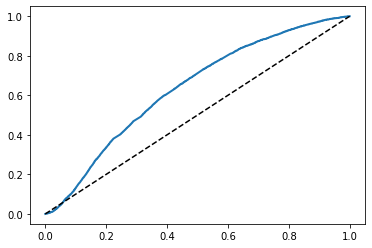

In [147]:
plot_roc_curve(fpr, tpr)
plt.show()


### Random forest model

In [159]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train_pca, y_train_norm, cv=5 ,method="predict_proba")

In [160]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_norm, y_scores_forest)

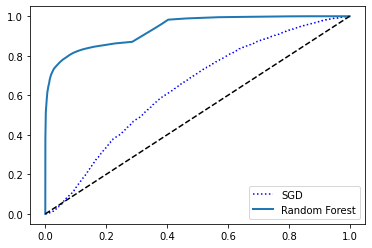

In [161]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [162]:
roc_auc_score(y_train_norm, y_scores_forest)

0.9360270494767724

In [163]:
y_train_pred = (y_scores_forest>=0.5)

In [164]:
confusion_matrix(y_train_norm, y_train_pred)

array([[28814,    50],
       [ 3491,  3725]])

In [165]:
precision_score(y_train_norm, y_train_pred)

0.9867549668874173

In [166]:
recall_score(y_train_norm, y_train_pred)

0.5162139689578714

In [167]:
f1_score(y_train_norm, y_train_pred)

0.6778273132563005

In [207]:

y_scores_forest_all = []
for train_class in range(1,5):
    print("----training classifier for %s----"%(num2class[train_class]))
    y_train_norm = (os_label == train_class)

    forest_clf = RandomForestClassifier(random_state=42)
    y_probas_forest = cross_val_predict(forest_clf, X_train_pca, y_train_norm, cv=5 ,method="predict_proba")
    y_scores_forest = y_probas_forest[:, 1]
    y_train_pred = (y_scores_forest>=0.5)
    y_scores_forest_all.append(y_scores_forest)

    print("accuracy: %.3f" % np.mean(cross_val_score(forest_clf, X_train_pca, y_train_norm, cv=5, scoring="accuracy")))
    print("precision: %.3f" % precision_score(y_train_norm, y_train_pred))
    print("recall: %.3f" % recall_score(y_train_norm, y_train_pred))
    print("f1-score: %.3f" % f1_score(y_train_norm, y_train_pred))
    print("roc score: %.3f" % roc_auc_score(y_train_norm, y_scores_forest))

----training classifier for MI----
accuracy: 0.904
precision: 0.993
recall: 0.535
f1-score: 0.695
roc score: 0.950
----training classifier for STTC----
accuracy: 0.899
precision: 0.987
recall: 0.516
f1-score: 0.678
roc score: 0.936
----training classifier for CD----
accuracy: 0.905
precision: 0.911
recall: 0.587
f1-score: 0.714
roc score: 0.914
----training classifier for HYP----
accuracy: 0.940
precision: 0.990
recall: 0.720
f1-score: 0.833
roc score: 0.963


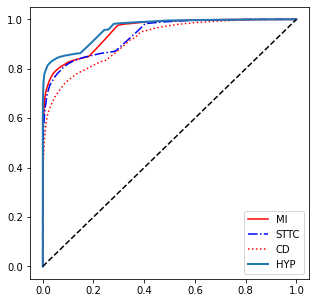

In [224]:
line = ["","r-", "b-.", "r:", "b--"]
plt.figure()
plt.rcParams['figure.figsize'] = (5.0, 5.0)

for i in range(3):

    y_train_norm = (os_label == i + 1)
    fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_norm, y_scores_forest_all[i])

    plt.plot(fpr_forest, tpr_forest, line[i+1], label=num2class[i+1])

y_train_norm = (os_label == 4)
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_norm, y_scores_forest_all[3])
plot_roc_curve(fpr_forest, tpr_forest, "HYP")
plt.legend(loc="lower right")